In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import seaborn as sns
    
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
 
from sklearn.linear_model import LinearRegression as lm
import statsmodels.api as sm

In [2]:
 # create a differenced series- get only random fluctuations
# this is like substracting the next value with previous
def difference(dataset, interval=1): # interval =1:default argument,remains 1 till change the value
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return (diff)

In [3]:
# Create large images!
register_matplotlib_converters()
sns.set_style("darkgrid")
plt.rc("figure", figsize=(14, 8)) # was 16,12
plt.rc("font", size=13)

# crude-oil-imports-to-india

In [4]:
import pip
#pip.main(["install", "openpyxl"])

In [5]:
import glob
import pandas as pd

# get data file names
path =r'D:\Ishangi_comeback\Aegis\Aegis_Advanced_Stats\Final_Assignment\Raw_data'
filenames = glob.glob(path + "/*.xlsx")

dfs = []

for df in dfs: 
    xl_file = pd.ExcelFile(filenames)

In [6]:
HGH = pd.read_excel("D:\Ishangi_comeback\Aegis\Aegis_Advanced_Stats\Final_Assignment\Raw_data\HortonGeneralHospital.xlsx") # data is taken every day
HGH.head(20)


,Unnamed: 0,Cardio,Resp,Hypo,Adm,year,month
0,1,1,0,0,413,1999,11
1,2,1,0,0,443,1999,12
2,3,1,0,0,378,2000,1
3,4,0,0,0,385,2000,2
4,5,1,0,0,388,2000,3
5,6,0,0,0,406,2000,4
6,7,3,0,0,409,2000,5
7,8,0,1,0,425,2000,6
8,9,0,1,0,453,2000,7
9,10,1,0,0,411,2000,8


In [7]:
HGH.tail(20)

,Unnamed: 0,Cardio,Resp,Hypo,Adm,year,month
119,120,1,0,0,616,2009,10
120,121,0,1,0,537,2009,11
121,122,0,1,0,609,2009,12
122,123,1,0,0,572,2010,1
123,124,0,1,0,515,2010,2
124,125,1,0,0,571,2010,3
125,126,0,0,0,540,2010,4
126,127,1,1,0,609,2010,5
127,128,1,0,0,583,2010,6
128,129,1,0,1,575,2010,7


In [8]:
HGH.isnull().sum() # check for null values

Unnamed: 0    0
Cardio        0
Resp          0
Hypo          0
Adm           0
year          0
month         0
dtype: int64

In [9]:
HGH.shape

(139, 7)

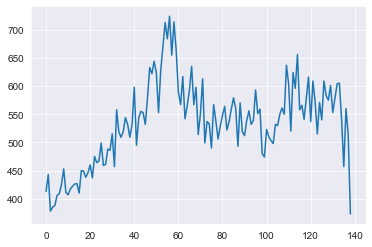

In [10]:
plt.plot(HGH['Adm'])

In [11]:
# considering only the 4th column of "No. Of admissions in the hospital"
# also, the 1st 2 data points are not considered in the analysis as they are last 2 months of a year
# for seasonality calculations, its better to have full year data
#resetting index
HGH_=HGH[2:]
HGH_1=HGH_.reset_index (drop=True) 


In [12]:
df_HGH=HGH_1["Adm"]
df_HGH

0      378
1      385
2      388
3      406
4      409
      ... 
132    541
133    457
134    560
135    514
136    373
Name: Adm, Length: 137, dtype: int64

In [13]:

df_HGH.shape

(137,)

In [14]:
sm.tsa.stattools.adfuller(df_HGH)

#IN ADF test, H0: Data is NOT STATIONARY
#             H1: Data is STATIONARY

#In result, 2nd value is p-value which is >0.05 hence, Null hypothesis can not be rejected(H0: Data is NOT STATIONARY).

(-2.3804051028771833,
 0.14734346759355843,
 2,
 134,
 {'1%': -3.480118600110386,
  '5%': -2.8833618426136196,
  '10%': -2.578407034974382},
 1268.9475419750145)

In [15]:
# De-trend once
df_HGH_diff1 = difference(df_HGH,1)

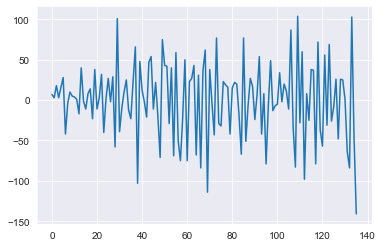

In [16]:
plt.plot(df_HGH_diff1)

In [17]:
# De-seasonalize once
# seasonality =12 is clear from STL decomposition graph
df_HGH_diff1_diff12 = difference(df_HGH_diff1, 12) 

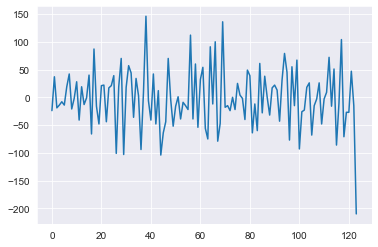

In [18]:
plt.plot(df_HGH_diff1_diff12)

In [19]:
# Running thorugh ADF again to check if data is stationary, because now visually the mean betweeen 2 time windows seems to be stationary
# there is no seen seasonality in the data
# Run ADF tests on the de-trended data

sm.tsa.stattools.adfuller(df_HGH_diff1_diff12)

# We observe that the p-value is < 0.05, thereby rejecting the NULL hypothesis of NON STATIONARITY
# Therefore the series is now STATIONARY

(-4.352985520188137,
 0.0003591683072468936,
 13,
 110,
 {'1%': -3.4912451337340342,
  '5%': -2.8881954545454547,
  '10%': -2.5809876033057852},
 1160.5323724429559)

In [20]:
# Creating STL decomposition
from statsmodels.tsa.seasonal import STL

In [21]:
stl = STL(df_HGH, period=12) # period 12 since its monthly data


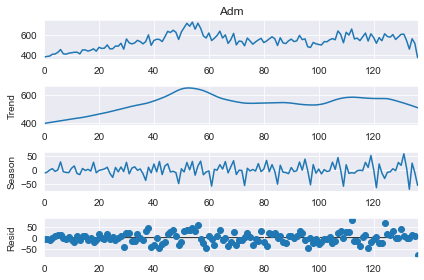

In [22]:
res = stl.fit()
fig = res.plot()

Split data into train and test (70-30)

In [23]:
#from sklearn.model_selection import train_test_split
# this will not work, because, it will take the data randomly and break the sequence

ratio = len(df_HGH)*7//10 # taking 70-30 split for train and test
train_HGH = df_HGH.iloc[:ratio,]
test_HGH=df_HGH.iloc[ratio:,]



In [24]:
train_HGH.shape

(95,)

In [25]:
train_HGH

0     378
1     385
2     388
3     406
4     409
     ... 
90    556
91    532
92    539
93    593
94    551
Name: Adm, Length: 95, dtype: int64

In [26]:
test_HGH

95     559
96     480
97     474
98     523
99     510
100    503
101    498
102    532
103    530
104    550
105    561
106    550
107    637
108    603
109    520
110    624
111    596
112    656
113    558
114    566
115    541
116    579
117    616
118    537
119    609
120    572
121    515
122    571
123    540
124    609
125    583
126    575
127    601
128    553
129    579
130    604
131    605
132    541
133    457
134    560
135    514
136    373
Name: Adm, dtype: int64

In [27]:
test_HGH.shape

(42,)

# M1- ARIMA

In [28]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


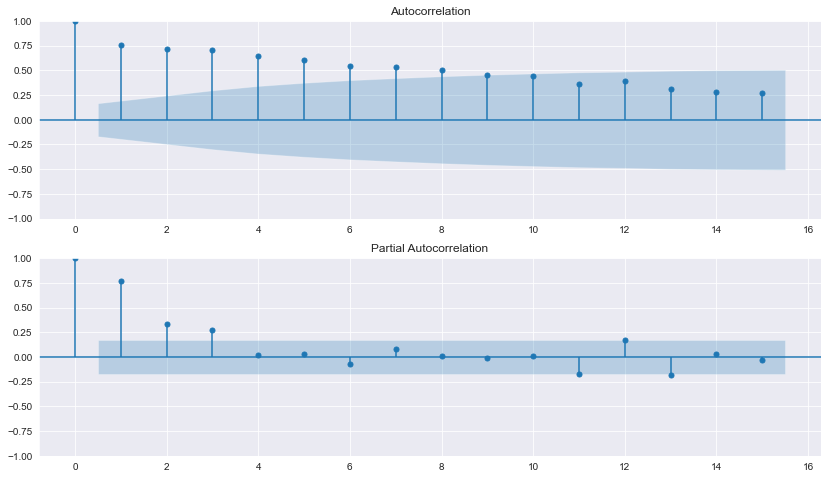

In [29]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_HGH, lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_HGH, lags=15, ax=ax2)

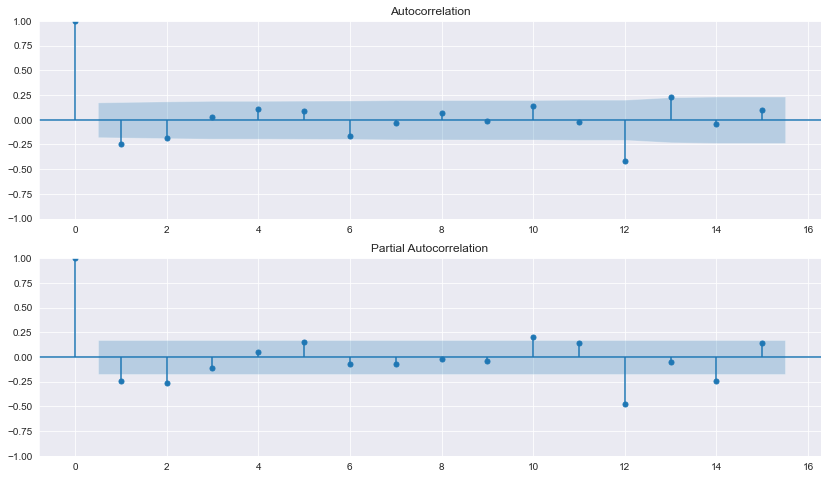

In [30]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_HGH_diff1_diff12, lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_HGH_diff1_diff12, lags=15, ax=ax2)

In [31]:
#Compute information criteria for many ARMA models.
#Each ic is an attribute with a DataFrame for the results. The AR order used is the row index. 
#The MA order used is the column index. The minimum orders are available as ic_min_order
sm.tsa.stattools.arma_order_select_ic(df_HGH_diff1_diff12)

C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'bic':              0            1            2
 0  1347.201352  1335.575888  1338.578748
 1  1343.465224  1339.383750  1339.611504
 2  1337.668107  1341.020366  1331.302002
 3  1340.251065  1345.038119  1346.957417
 4  1344.963550  1349.385170  1339.685564,
 'bic_min_order': (2, 2)}

In [32]:
# As per the ACF, PACF plot, p=2
# Also, as per above function, bic_min_order': (2, 2) which ,says p=2, q=2
# The AIC and BIC for p=2,q=0 is minimum as compared to other values and p-value is significant
# Conclusion: It is a model explained by Auto-regression
M1 = sm.tsa.arima.ARIMA(train_HGH,order=(2,1,0),seasonal_order=(0,1,0,12))
M1_res = M1.fit()
M1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              Adm   No. Observations:                   95
Model:             ARIMA(2, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -431.472
Date:                          Mon, 29 Aug 2022   AIC                            868.945
Time:                                  22:28:20   BIC                            876.165
Sample:                                       0   HQIC                           871.843
                                           - 95                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3697      0.104     -3.565      0.000      -0.573      -0.166
ar.L2         -0.3308      0.083     -3.969      0.000      -0.494      -0.167
sigma2      2169.0395    310.420      6.987      0.000    1560.628    2777.451
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 1.31
Prob(Q):                              0.83   Prob(JB):                         0.52
Heteroskedasticity (H):               2.55   Skew:                             0.21
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

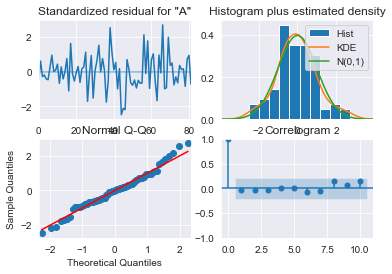

In [33]:
pred = M1_res.plot_diagnostics()

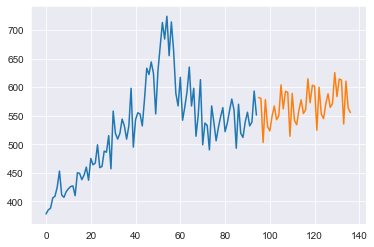

In [34]:
tforecast =  M1_res.forecast(42)# 42 is the test size, so forecasting for the same 
plt.plot(train_HGH)
plt.plot(tforecast)

In [35]:
tforecast

95     581.759594
96     579.952979
97     503.037310
98     578.015559
99     531.043105
100    523.222917
101    549.193828
102    566.845600
103    542.945063
104    549.692685
105    603.753087
106    561.814243
107    592.531247
108    590.720147
109    513.820225
110    588.794136
111    541.818076
112    534.000656
113    559.971736
114    577.622531
115    553.722299
116    560.470132
117    614.530355
118    572.591507
119    603.308571
120    601.497451
121    524.597517
122    599.571439
123    552.595379
124    544.777955
125    570.749037
126    588.399832
127    564.499599
128    571.247432
129    625.307655
130    583.368808
131    614.085872
132    612.274751
133    535.374817
134    610.348739
135    563.372679
136    555.555256
Name: predicted_mean, dtype: float64

In [36]:
tpredict =  M1_res.predict(1)
tpredict

1     377.861610
2     384.881150
3     388.081221
4     405.993467
5     408.957751
         ...    
90    548.251197
91    571.416199
92    505.449599
93    549.116706
94    584.372496
Name: predicted_mean, Length: 94, dtype: float64

In [37]:
train_HGH

0     378
1     385
2     388
3     406
4     409
     ... 
90    556
91    532
92    539
93    593
94    551
Name: Adm, Length: 95, dtype: int64

In [38]:
#manually calculating the RMSE for train dataset
((train_HGH[1:]-tpredict)**2).mean()

2306.9816260686753

In [39]:
import math
math.sqrt(2306.9816260686753)

48.03104856307715

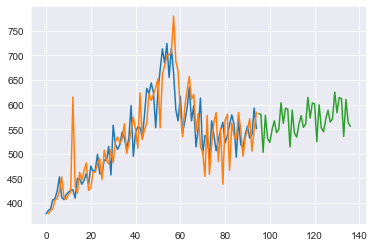

In [40]:
plt.plot(train_HGH) # blue
plt.plot(tpredict)#orange
plt.plot(tforecast) #green

In [41]:
tforecast2 = M1_res.get_forecast(42)
confint = np.array(tforecast2.conf_int())

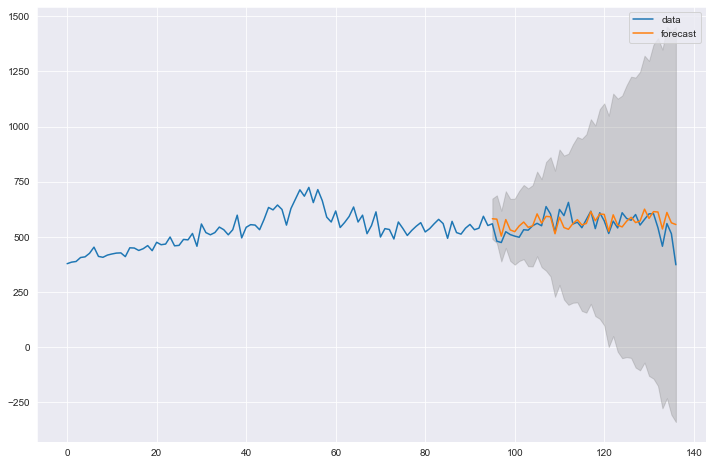

In [42]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df_HGH.index, df_HGH, label='data')
ax.plot(tforecast2.predicted_mean.index, tforecast2.predicted_mean, label='forecast')
ax.fill_between(tforecast2.predicted_mean.index, confint[:,0], confint[:,1],color='gray',alpha=0.3)
ax.legend()

In [43]:
#RMSE for test data for M1(ARIMA)
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test_HGH,tforecast,squared=False)
RMSE

49.905193481923426

In [44]:
# Calculating R-Squared to evaluate the model
#The ideal value for R-squared is 1 for best fit model
#Value of R-square can also be negative when the model fitted is worse than the average fitted model. 

from sklearn.metrics import r2_score

r2 = r2_score(test_HGH, tforecast)
r2

0.09708645577272856

# M2- AutoARIMA

In [45]:
 #!pip install pmdarima

In [46]:
import pmdarima as pm

In [47]:
M2 = pm.auto_arima(train_HGH,start_p=0, start_q=0,
                             max_p=5, max_q=5, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=881.052, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=858.875, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=876.420, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=852.552, Time=0.23 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.00 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=856.909, Time=0.15 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=845.553, Time=0.39 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=850.076, Time=0.13 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.62 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=847.342, Time=0.35 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=847.393, Time=

In [48]:
M2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   95
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -417.776
Date:                            Mon, 29 Aug 2022   AIC                            845.553
Time:                                    22:28:29   BIC                            857.586
Sample:                                         0   HQIC                           850.384
                                             - 95                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3613      0.091     -3.952      0.000      -0.540      -0.182
ar.L2         -0.3249      0.103     -3.148      0.002      -0.527      -0.123
ar.S.L12      -0.6061      0.101     -5.977      0.000      -0.805      -0.407
ar.S.L24      -0.3030      0.126     -2.406      0.016      -0.550      -0.056
sigma2      1457.3614    239.325      6.089      0.000     988.293    1926.430
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.97
Prob(Q):                              0.83   Prob(JB):                         0.61
Heteroskedasticity (H):               1.82   Skew:                            -0.26
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

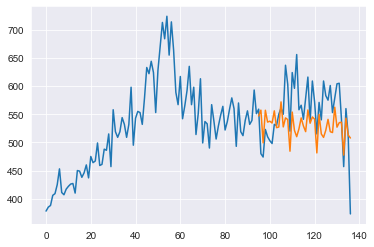

In [49]:
M2.fit(train_HGH)
fc = M2.predict(42)
plt.plot(df_HGH)
plt.plot(np.arange(95,95+42,1),fc)


In [50]:
fc

95     546.902607
96     557.284419
97     499.185005
98     557.085850
99     536.061421
100    537.637702
101    534.385146
102    555.998980
103    526.116614
104    527.365053
105    571.904654
106    527.511354
107    543.487252
108    540.593650
109    484.369724
110    553.850961
111    521.321216
112    510.124160
113    523.997723
114    543.420871
115    529.222430
116    519.111929
117    557.570294
118    534.017379
119    545.126673
120    541.378216
121    481.320910
122    549.569153
123    514.931724
124    508.878814
125    521.536974
126    540.890160
127    518.967182
128    517.484332
129    562.494958
130    527.034895
131    535.012543
132    535.804232
133    477.502291
134    542.989453
135    513.115285
136    507.814163
dtype: float64

In [51]:
#RMSE for test data for M2 (Auto-ARIMA)
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test_HGH,fc,squared=False)
RMSE

55.10789805138902

In [52]:
from sklearn.metrics import r2_score

r2 = r2_score(test_HGH, fc)
r2

-0.10098746124100777

# M3- Holts Winter's Model

# Simple Exponential Smoothing: Level 

In [53]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [54]:
ses = SimpleExpSmoothing(train_HGH)

In [55]:
type(ses)

statsmodels.tsa.holtwinters.model.SimpleExpSmoothing

In [56]:
result1 = ses.fit(smoothing_level=0.5, optimized=False)

In [57]:
result1.summary()

Dep. Variable:,Adm,No. Observations:,95
Model:,SimpleExpSmoothing,SSE,123338.984
Optimized:,False,AIC,685.037
Trend:,None,BIC,690.145
Seasonal:,None,AICC,685.482
Seasonal Periods:,None,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,22:28:29
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,378.00000,l.0,False


In [58]:
pred1 = result1.predict(start=1, end=137)

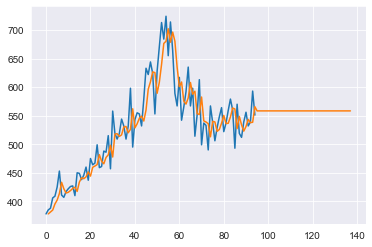

In [59]:
plt.plot(train_HGH)
plt.plot(pred1)

In [60]:
result1.params

{'smoothing_level': 0.5,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 378.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

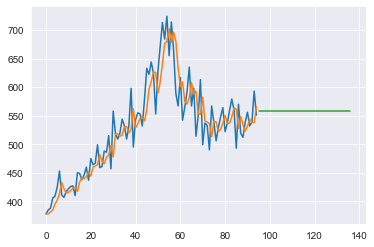

In [61]:
plt.plot(train_HGH)
plt.plot(result1.fittedvalues)
plt.plot(result1.forecast(42))

In [62]:
result2 = ses.fit(smoothing_level=0.8, optimized=False) # optimize the values of alpha from 0.5 to 0.8

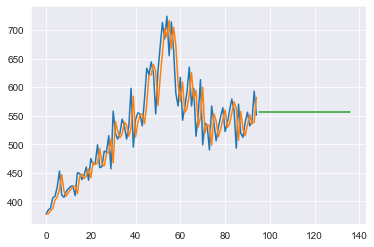

In [63]:
plt.plot(train_HGH)
plt.plot(result2.fittedvalues)
plt.plot(result2.forecast(42))
# the model is better fitted when we increase the alpha from 0.5 to 0.8 i.e. the model is better explained by the recent observed value of alpha as compared to previous values

In [64]:
result2.params

{'smoothing_level': 0.8,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 378.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

# Holt's linear trend values: Level+Trend

In [65]:
from statsmodels.tsa.holtwinters import Holt

In [66]:
model = Holt(train_HGH)
result3 = model.fit()
result3.params

{'smoothing_level': 0.4408445791673984,
 'smoothing_trend': 0.00011475435879822458,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 382.18345532242347,
 'initial_trend': 1.8590297484661675,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [67]:
result3.summary()

Dep. Variable:,Adm,No. Observations:,95
Model:,Holt,SSE,121288.825
Optimized:,True,AIC,687.445
Trend:,Additive,BIC,697.661
Seasonal:,None,AICC,688.400
Seasonal Periods:,None,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,22:28:30
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4408446,alpha,True
smoothing_trend,0.0001148,beta,True


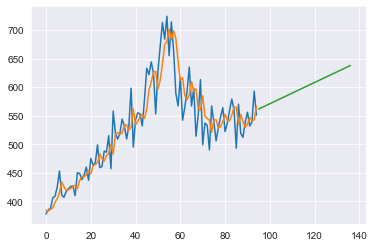

In [68]:
plt.plot(train_HGH)
plt.plot(result3.fittedvalues)
plt.plot(result3.forecast(42))

# Final Holtz Winter Model: Level+Trend+Seasonality

In [69]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [70]:
model = ExponentialSmoothing(train_HGH, trend='add', seasonal='add', seasonal_periods=12)
# seasonal = add as this is a additive model and not multiplicative as the amplitude is not changing

In [71]:
result4 = model.fit()
result4.params

{'smoothing_level': 0.5209880055861671,
 'smoothing_trend': 0.001165001224208138,
 'smoothing_seasonal': 0.0009556967556655208,
 'damping_trend': nan,
 'initial_level': 394.3397443888305,
 'initial_trend': 1.7360460722271958,
 'initial_seasons': array([ -8.10448171, -39.96820032,   6.8124884 ,  -7.01884038,
          5.84914094,  -4.23577678,  25.17370687, -12.16080537,
          2.51006513,  18.55835038,  -6.90772023,   2.96142832]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [72]:
result4.summary()

Dep. Variable:,Adm,No. Observations:,95
Model:,ExponentialSmoothing,SSE,87651.904
Optimized:,True,AIC,680.589
Trend:,Additive,BIC,721.451
Seasonal:,Additive,AICC,689.589
Seasonal Periods:,12,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,22:28:30
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5209880,alpha,True
smoothing_trend,0.0011650,beta,True


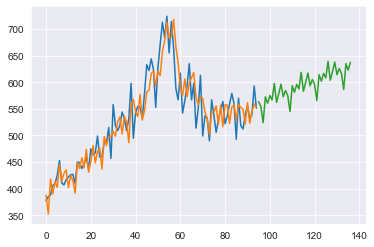

In [73]:
plt.plot(train_HGH)
plt.plot(result4.fittedvalues)
plt.plot(result4.forecast(42))

In [74]:
result4.forecast(42)

95     563.605308
96     554.267323
97     524.131256
98     572.641267
99     560.537373
100    575.133380
101    566.776842
102    597.915938
103    562.310989
104    578.712896
105    596.492542
106    572.759098
107    584.355680
108    575.017696
109    544.881629
110    593.391640
111    581.287745
112    595.883753
113    587.527214
114    618.666310
115    583.061362
116    599.463268
117    617.242914
118    593.509470
119    605.106053
120    595.768069
121    565.632001
122    614.142012
123    602.038118
124    616.634125
125    608.277587
126    639.416683
127    603.811734
128    620.213641
129    637.993287
130    614.259843
131    625.856425
132    616.518441
133    586.382374
134    634.892385
135    622.788491
136    637.384498
dtype: float64

In [75]:
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test_HGH,result4.forecast(42),squared=False)
RMSE

65.64591133425324

In [76]:
from sklearn.metrics import r2_score

r2 = r2_score(test_HGH, result4.forecast(42))
r2

-0.5623201857193731

# Conclusion: ARIMA model is the preferred model for this data as it is showing better R-squared value and better accuracy